In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv


In [3]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()



In [6]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [7]:
# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [4]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


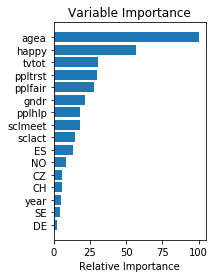

In [5]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [764]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 21,
          'max_depth': 4,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.03136933987997818
Percent Type II errors: 0.2030823786142935

Test set accuracy:
Percent Type I errors: 0.04294478527607362
Percent Type II errors: 0.2184049079754601


In [12]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 800,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.04487179487179487
Percent Type II errors: 0.17144026186579378

Test set accuracy:
Percent Type I errors: 0.0687116564417178
Percent Type II errors: 0.18159509202453988


In [768]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 50,
          'max_depth': 3,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.036824877250409165
Percent Type II errors: 0.19421713038734315

Test set accuracy:
Percent Type I errors: 0.04785276073619632
Percent Type II errors: 0.2098159509202454


# Use Other Method to Choose Features

# Use Method to get Baseline

In [758]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
import time
from sklearn import ensemble
from sklearn import linear_model
from sklearn.model_selection import cross_val_score 
from IPython.display import clear_output

class Tuner():
    
    def __init__(self,X,y,cvFolds=10, **tunerRanges):
        self.X = X
        self.y = y
        self.cvFolds = cvFolds
        self.results = pd.DataFrame()
        self.results = pd.DataFrame(columns=['Name', 'Accuracy', 'Range', 'CrossValScores'])
        self.setTunerSpecific(**tunerRanges)
        self.genResults()
    
    def DisplayResultsGraph(self):
        labels = []
        widthscale = self.results.shape[0]/4
        if widthscale < 8:
            widthscale = 8
        plt.figure(figsize=(widthscale,6))
        plt.plot(self.results['Accuracy'])
        labels.append('Accuracy')
        plt.plot(self.results['Accuracy'] + self.results['Range'])
        labels.append('Accuracy + Range')
        plt.legend(labels)
        plt.xticks(np.arange(self.results.shape[0]), (self.results['Name']),rotation=90)
        plt.show()
    
    def DisplayResultsSummary(self):
        resultSortAcc = self.results.sort_values('Accuracy', ascending=False)
        resultSortRan = self.results.sort_values('Range', ascending=True)
        
        print("Highest Accuracy")
        display(resultSortAcc.head())
        
        print("\nLowest Range")
        display(resultSortRan.head())
        
    def FullResult(self):
        self.DisplayResultsGraph()
        self.DisplayResultsSummary()
        
    def disBox(self):
        plt.boxplot(self.results)
        ax.set_xticklabels(names)
        plt.setp(ax.get_xticklabels(), rotation=90)
        plt.show()
                    
class GradientBoostTuner(Tuner):
    
    def setTunerSpecific(self,**tunerRanges):
        paramList = itertools.product(
            ranges['loss'], 
            ranges['n_esitmators'], 
            ranges['max_depth'])
        self.__setParamsResultList(paramList)
        
    def __setParamsResultList(self,paramList):
        for i in paramList:
            name = "{0} d:{1} e:{2}".format(i[0][:1],i[1],i[2])
            self.results = self.results.append({'Name':name, 
                            'loss':i[0],
                           'n_estimators':i[1],
                           'max_depth':i[2]}, ignore_index=True)
            
    
    def __getCrossVal(self,loss, depth, estimators):
        params = {'n_estimators': int(estimators),
                 'max_depth': int(depth),
                 'loss': loss}
        gb = ensemble.GradientBoostingClassifier(**params)
        cvs = cross_val_score(gb,self.X,self.y,cv=self.cvFolds)
        return cvs
    
    def genResults(self): 
        totIter = self.results.shape[0]
        c=1
        for index,row in self.results.iterrows():
            params = {'n_estimators': int(row.n_estimators),
                     'max_depth': int(row.max_depth),
                     'loss': row.loss}
            gb = ensemble.GradientBoostingClassifier(**params)
            cvs = cross_val_score(gb,self.X,self.y,cv=self.cvFolds)
            self.results.set_value(index,'CrossValScores', cvs)
            self.results.set_value(index,'Accuracy', np.mean(cvs))
            self.results.set_value(index,'Range', max(cvs)-min(cvs))
            clear_output()
            print ("{:.0%} {}".format((c/totIter), self.results.iloc[index].Name))
            c += 1
        self.results = self.results.sort_values(['Accuracy'], axis=0)
        self.results = self.results.reset_index(drop=True)

100% d d:49 e:4


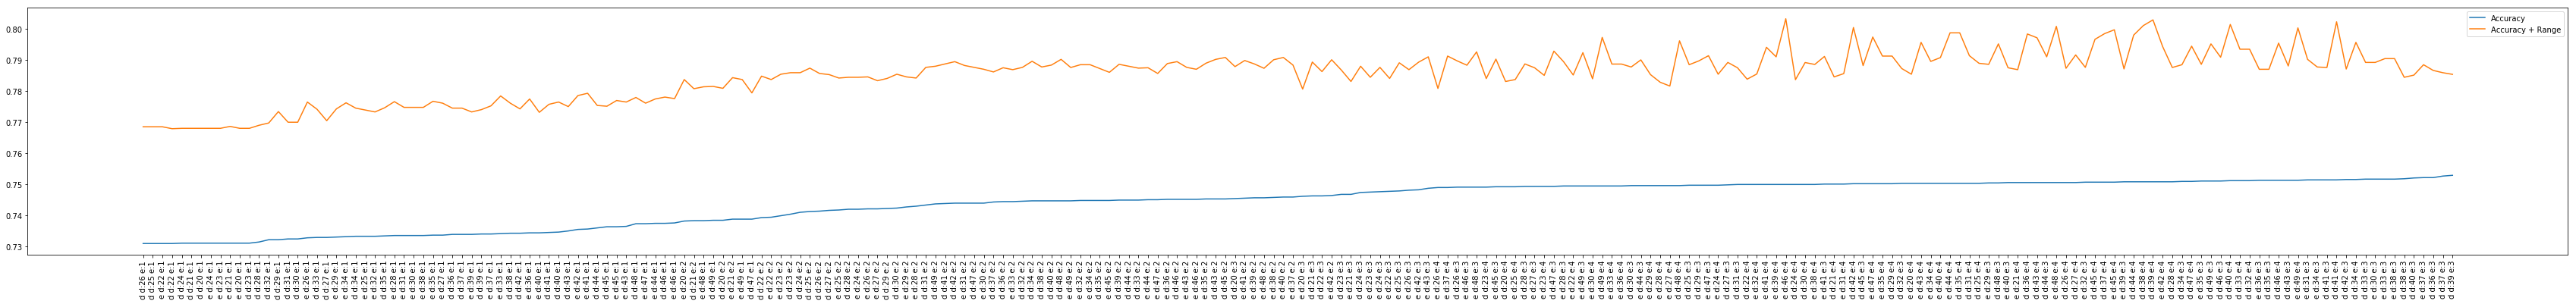

Highest Accuracy


,Name,Accuracy,Range,CrossValScores,loss,max_depth,n_estimators
239,d d:39 e:3,0.752914,0.0325153,"[0.768711656442, 0.736196319018, 0.76809815950...",deviance,3.0,39.0
238,d d:37 e:3,0.752668,0.0332912,"[0.768711656442, 0.739877300613, 0.76687116564...",deviance,3.0,37.0
237,d d:36 e:3,0.752177,0.0345197,"[0.767484662577, 0.739877300613, 0.76625766871...",deviance,3.0,36.0
236,e d:37 e:3,0.752175,0.036359,"[0.771165644172, 0.737423312883, 0.76993865030...",exponential,3.0,37.0
235,d d:40 e:3,0.752055,0.0331288,"[0.768098159509, 0.734969325153, 0.76687116564...",deviance,3.0,40.0



Lowest Range


,Name,Accuracy,Range,CrossValScores,loss,max_depth,n_estimators
134,e d:26 e:4,0.748986,0.0319018,"[0.762576687117, 0.732515337423, 0.76441717791...",exponential,4.0,26.0
158,e d:27 e:4,0.749599,0.0320657,"[0.763190184049, 0.735582822086, 0.76503067484...",exponential,4.0,27.0
239,d d:39 e:3,0.752914,0.0325153,"[0.768711656442, 0.736196319018, 0.76809815950...",deviance,3.0,39.0
234,d d:38 e:3,0.751809,0.0326777,"[0.768098159509, 0.736196319018, 0.76625766871...",deviance,3.0,38.0
235,d d:40 e:3,0.752055,0.0331288,"[0.768098159509, 0.734969325153, 0.76687116564...",deviance,3.0,40.0


In [766]:
ranges = {'loss': ['exponential', 'deviance'],
    'n_esitmators': range(20,50,1),
    'max_depth': range(1,5,1)}
gradBoostTuner6 = GradientBoostTuner(X,y,cvFolds=5,**ranges)
gradBoostTuner6.FullResult()

In [767]:
gradBoostTuner6.results.shape

(240, 7)

100% d d:39 e:4


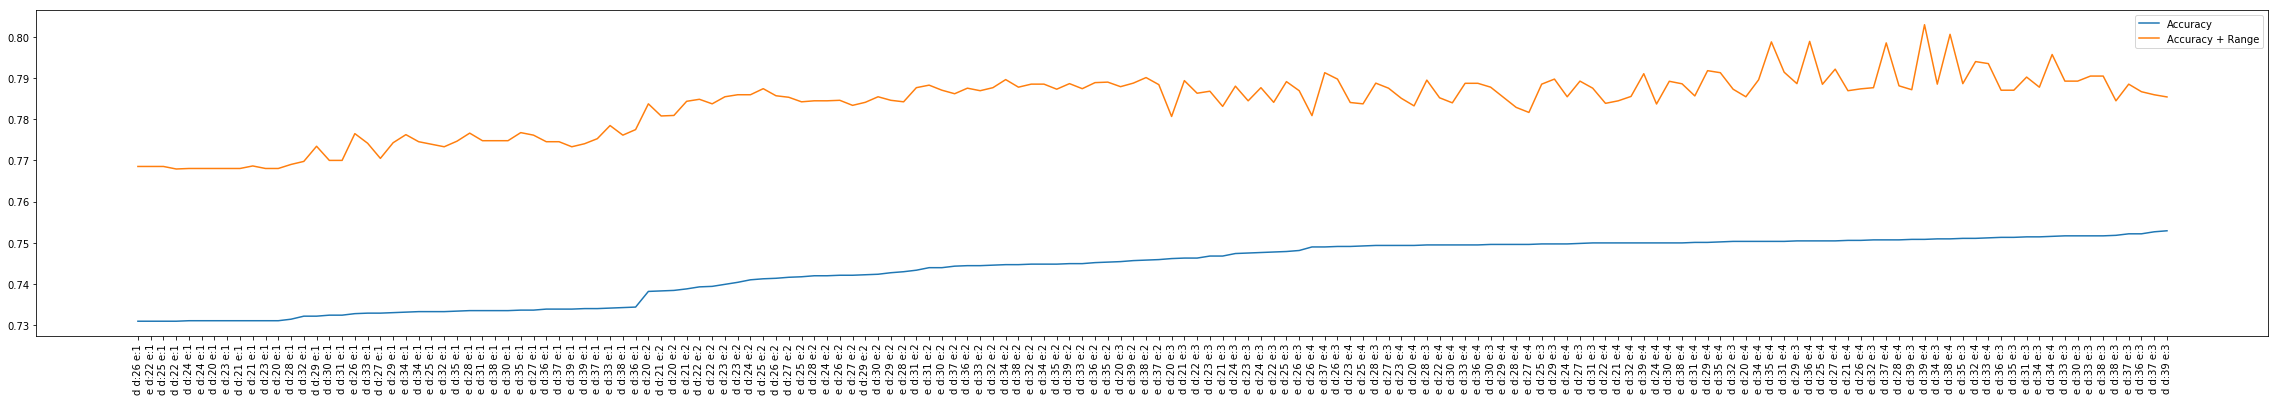

Highest Accuracy


,Name,Accuracy,Range,CrossValScores,loss,max_depth,n_estimators
159,d d:39 e:3,0.752914,0.0325153,"[0.768711656442, 0.736196319018, 0.76809815950...",deviance,3.0,39.0
158,d d:37 e:3,0.752668,0.0332912,"[0.768711656442, 0.739877300613, 0.76687116564...",deviance,3.0,37.0
157,d d:36 e:3,0.752177,0.0345197,"[0.767484662577, 0.739877300613, 0.76625766871...",deviance,3.0,36.0
156,e d:37 e:3,0.752175,0.036359,"[0.771165644172, 0.737423312883, 0.76993865030...",exponential,3.0,37.0
155,d d:38 e:3,0.751809,0.0326777,"[0.768098159509, 0.736196319018, 0.76625766871...",deviance,3.0,38.0



Lowest Range


,Name,Accuracy,Range,CrossValScores,loss,max_depth,n_estimators
92,e d:26 e:4,0.748986,0.0319018,"[0.762576687117, 0.732515337423, 0.76441717791...",exponential,4.0,26.0
109,e d:27 e:4,0.749599,0.0320657,"[0.763190184049, 0.735582822086, 0.76503067484...",exponential,4.0,27.0
159,d d:39 e:3,0.752914,0.0325153,"[0.768711656442, 0.736196319018, 0.76809815950...",deviance,3.0,39.0
155,d d:38 e:3,0.751809,0.0326777,"[0.768098159509, 0.736196319018, 0.76625766871...",deviance,3.0,38.0
158,d d:37 e:3,0.752668,0.0332912,"[0.768711656442, 0.739877300613, 0.76687116564...",deviance,3.0,37.0


In [765]:
ranges = {'loss': ['exponential', 'deviance'],
    'n_esitmators': range(20,50,1),
    'max_depth': range(1,5,1)}
gradBoostTuner6 = GradientBoostTuner(X,y,cvFolds=5,**ranges)
gradBoostTuner6.FullResult()

100% d d:39 e:4


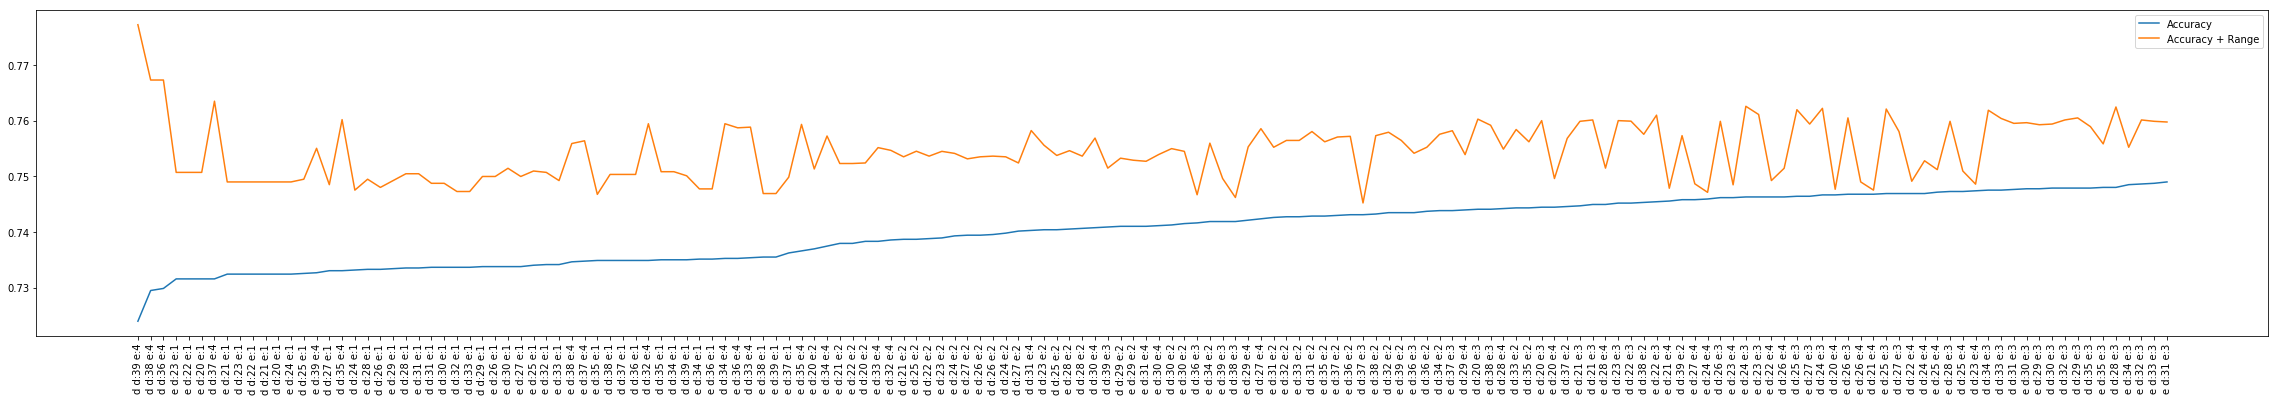

Highest Accuracy


,Name,Accuracy,Range,CrossValScores,loss,max_depth,n_estimators
159,e d:31 e:3,0.748987,0.010772,"[0.754050073638, 0.749631811487, 0.743278084715]",exponential,3.0,31.0
158,e d:33 e:3,0.748741,0.0111402,"[0.75441826215, 0.74852724595, 0.743278084715]",exponential,3.0,33.0
157,e d:32 e:3,0.748618,0.0115085,"[0.75441826215, 0.74852724595, 0.742909760589]",exponential,3.0,32.0
156,e d:34 e:3,0.748496,0.00672164,"[0.750736377025, 0.750736377025, 0.744014732965]",exponential,3.0,34.0
155,d d:28 e:3,0.748005,0.014454,"[0.75736377025, 0.743740795287, 0.742909760589]",deviance,3.0,28.0



Lowest Range


,Name,Accuracy,Range,CrossValScores,loss,max_depth,n_estimators
136,d d:21 e:4,0.746778,0.000736377,"[0.7470544919, 0.746318114875, 0.746961325967]",deviance,4.0,21.0
133,d d:20 e:4,0.746655,0.00101154,"[0.746318114875, 0.746318114875, 0.747329650092]",deviance,4.0,20.0
144,d d:23 e:4,0.747392,0.00119787,"[0.747790868925, 0.747790868925, 0.746593001842]",deviance,4.0,23.0
123,e d:24 e:4,0.745919,0.00119827,"[0.74558173785, 0.746686303387, 0.745488029466]",exponential,4.0,24.0
96,d d:37 e:3,0.743096,0.00211502,"[0.74263622975, 0.742268041237, 0.74438305709]",deviance,3.0,37.0


In [762]:
ranges = {'loss': ['exponential', 'deviance'],
    'n_esitmators': range(20,40,1),
    'max_depth': range(1,5,1)}
gradBoostTuner6 = GradientBoostTuner(X,y,cvFolds=3,**ranges)
gradBoostTuner6.FullResult()

In [763]:
gradBoostTuner6.results.shape

(160, 7)

In [761]:
gradBoostTuner6.results.shape

(200, 7)

100% d d:39 e:4


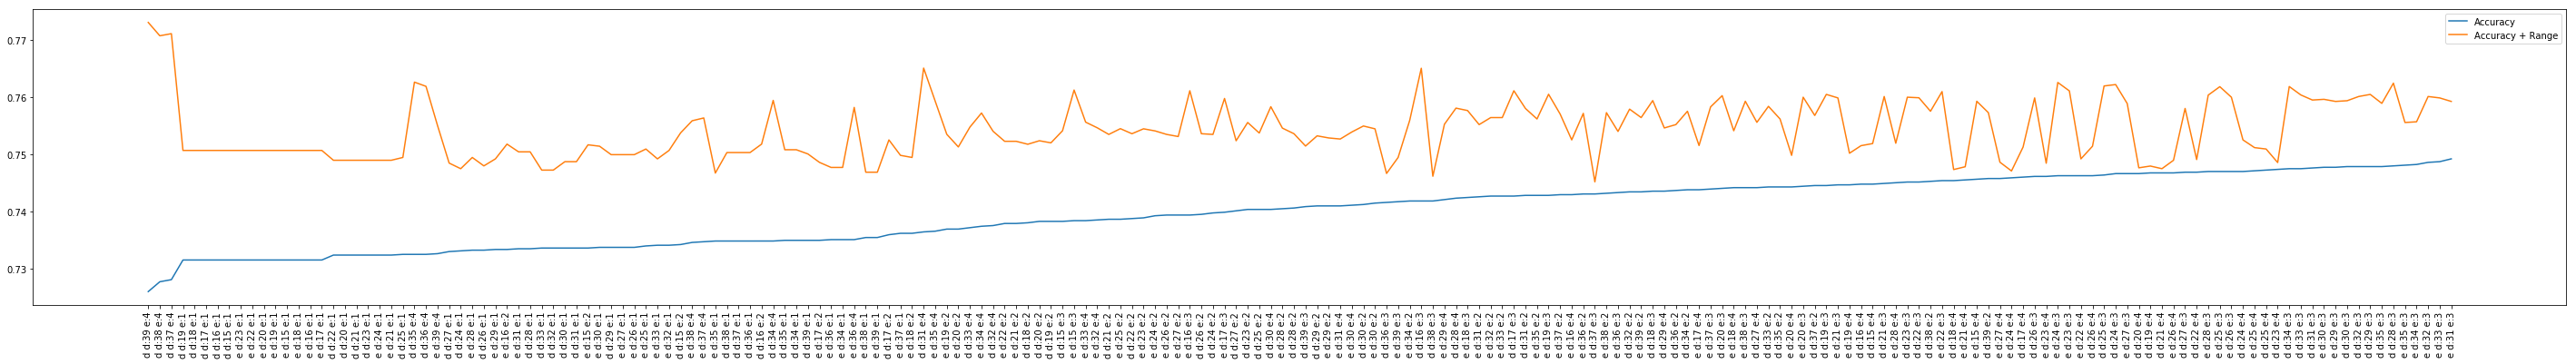

Highest Accuracy


,Name,Accuracy,Range,CrossValScores,loss,max_depth,n_estimators
199,e d:31 e:3,0.749232,0.0100353,"[0.754050073638, 0.749631811487, 0.744014732965]",exponential,3.0,31.0
198,e d:33 e:3,0.748741,0.0111402,"[0.75441826215, 0.74852724595, 0.743278084715]",exponential,3.0,33.0
197,e d:32 e:3,0.748618,0.0115085,"[0.75441826215, 0.74852724595, 0.742909760589]",exponential,3.0,32.0
196,e d:34 e:3,0.74825,0.00745829,"[0.750736377025, 0.750736377025, 0.743278084715]",exponential,3.0,34.0
195,e d:35 e:3,0.748128,0.00745829,"[0.750368188513, 0.750736377025, 0.743278084715]",exponential,3.0,35.0



Lowest Range


,Name,Accuracy,Range,CrossValScores,loss,max_depth,n_estimators
174,d d:21 e:4,0.746778,0.000736377,"[0.7470544919, 0.746318114875, 0.746961325967]",deviance,4.0,21.0
172,d d:20 e:4,0.746655,0.00101154,"[0.746318114875, 0.746318114875, 0.747329650092]",deviance,4.0,20.0
184,d d:23 e:4,0.747392,0.00119787,"[0.747790868925, 0.747790868925, 0.746593001842]",deviance,4.0,23.0
173,d d:19 e:4,0.746778,0.001198,"[0.747422680412, 0.746686303387, 0.746224677716]",deviance,4.0,19.0
161,e d:24 e:4,0.745919,0.00119827,"[0.74558173785, 0.746686303387, 0.745488029466]",exponential,4.0,24.0


In [760]:
ranges = {'loss': ['exponential', 'deviance'],
    'n_esitmators': range(20,40,1),
    'max_depth': range(1,5,1)}
gradBoostTuner6 = GradientBoostTuner(X,y,cvFolds=3,**ranges)
gradBoostTuner6.FullResult()

100% d d:59 e:4


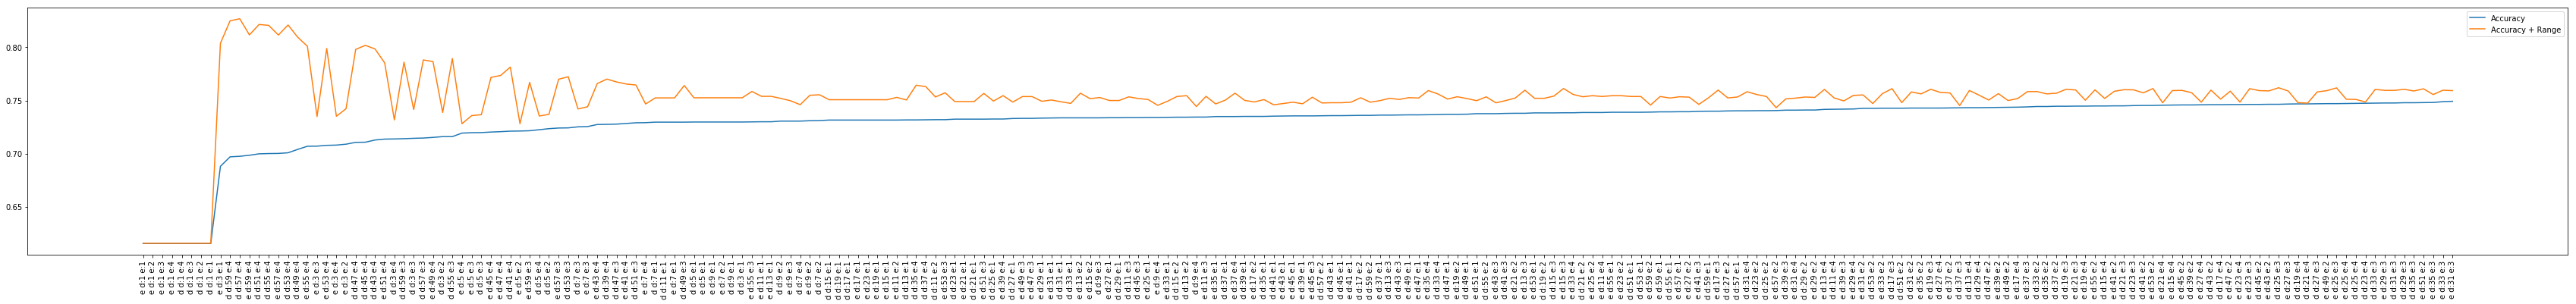

Highest Accuracy


,Name,Accuracy,Range,CrossValScores,loss,max_depth,n_estimators
239,e d:31 e:3,0.749232,0.0100353,"[0.754050073638, 0.749631811487, 0.744014732965]",exponential,3.0,31.0
238,e d:33 e:3,0.748864,0.0107719,"[0.75441826215, 0.74852724595, 0.74364640884]",exponential,3.0,33.0
237,e d:35 e:3,0.748128,0.00745829,"[0.750368188513, 0.750736377025, 0.743278084715]",exponential,3.0,35.0
236,e d:51 e:2,0.748005,0.0129821,"[0.753681885125, 0.749631811487, 0.740699815838]",exponential,2.0,51.0
235,d d:35 e:3,0.747882,0.0110457,"[0.755154639175, 0.7441089838, 0.74438305709]",deviance,3.0,35.0



Lowest Range


,Name,Accuracy,Range,CrossValScores,loss,max_depth,n_estimators
0,e d:1 e:1,0.615319,0.000226609,"[0.615243004418, 0.615243004418, 0.61546961326]",exponential,1.0,1.0
1,e d:1 e:2,0.615319,0.000226609,"[0.615243004418, 0.615243004418, 0.61546961326]",exponential,2.0,1.0
2,e d:1 e:3,0.615319,0.000226609,"[0.615243004418, 0.615243004418, 0.61546961326]",exponential,3.0,1.0
3,e d:1 e:4,0.615319,0.000226609,"[0.615243004418, 0.615243004418, 0.61546961326]",exponential,4.0,1.0
4,d d:1 e:4,0.615319,0.000226609,"[0.615243004418, 0.615243004418, 0.61546961326]",deviance,4.0,1.0


In [749]:
ranges = {'loss': ['exponential', 'deviance'],
    'n_esitmators': range(1,60,2),
    'max_depth': range(1,5,1)}
gradBoostTuner6 = GradientBoostTuner(X,y,cvFolds=3,**ranges)
gradBoostTuner6.FullResult()

100% d d:96 e:4


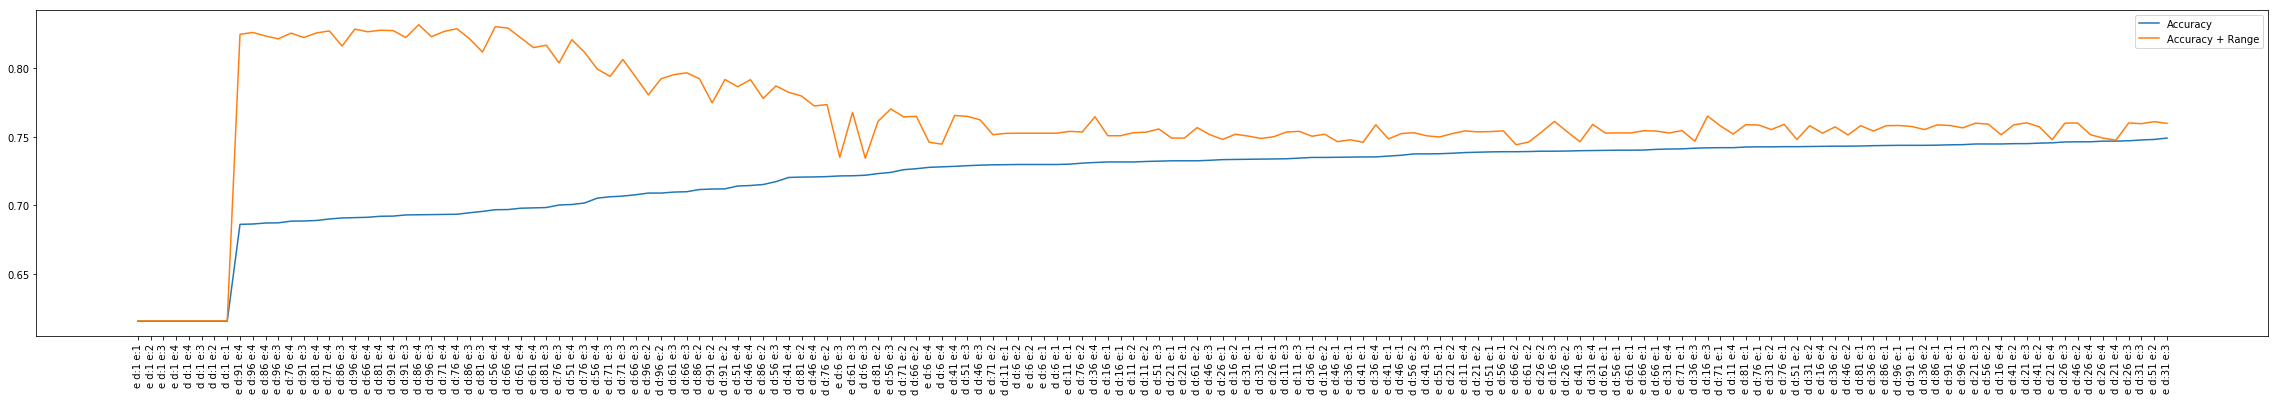

Highest Accuracy


,Name,Accuracy,Range,CrossValScores,loss,max_depth,n_estimators
159,e d:31 e:3,0.748987,0.010772,"[0.754050073638, 0.749631811487, 0.743278084715]",exponential,3.0,31.0
158,e d:51 e:2,0.748005,0.0129821,"[0.753681885125, 0.749631811487, 0.740699815838]",exponential,2.0,51.0
157,d d:31 e:3,0.747637,0.0118766,"[0.755154639175, 0.744477172312, 0.743278084715]",deviance,3.0,31.0
156,e d:26 e:3,0.747023,0.0129819,"[0.754050073638, 0.745949926362, 0.741068139963]",exponential,3.0,26.0
155,d d:21 e:4,0.746778,0.000736377,"[0.7470544919, 0.746318114875, 0.746961325967]",deviance,4.0,21.0



Lowest Range


,Name,Accuracy,Range,CrossValScores,loss,max_depth,n_estimators
0,e d:1 e:1,0.615319,0.000226609,"[0.615243004418, 0.615243004418, 0.61546961326]",exponential,1.0,1.0
1,e d:1 e:2,0.615319,0.000226609,"[0.615243004418, 0.615243004418, 0.61546961326]",exponential,2.0,1.0
2,e d:1 e:3,0.615319,0.000226609,"[0.615243004418, 0.615243004418, 0.61546961326]",exponential,3.0,1.0
3,e d:1 e:4,0.615319,0.000226609,"[0.615243004418, 0.615243004418, 0.61546961326]",exponential,4.0,1.0
4,d d:1 e:4,0.615319,0.000226609,"[0.615243004418, 0.615243004418, 0.61546961326]",deviance,4.0,1.0


In [748]:
ranges = {'loss': ['exponential', 'deviance'],
    'n_esitmators': range(1,100,5),
    'max_depth': range(1,5,1)}
gradBoostTuner5 = GradientBoostTuner(X,y,cvFolds=3,**ranges)
gradBoostTuner5.FullResult()

100% d d:180 e:4


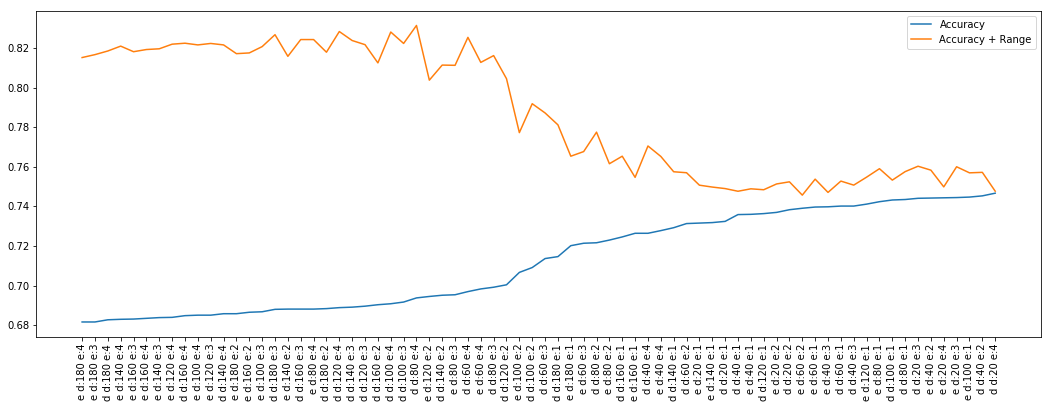

Highest Accuracy


,Name,Accuracy,Range,CrossValScores,loss,max_depth,n_estimators
71,d d:20 e:4,0.746655,0.00101154,"[0.746318114875, 0.746318114875, 0.747329650092]",deviance,4.0,20.0
70,d d:40 e:2,0.745304,0.0118783,"[0.750368188513, 0.7470544919, 0.738489871087]",deviance,2.0,40.0
69,e d:100 e:1,0.744691,0.0122464,"[0.751104565538, 0.7441089838, 0.738858195212]",exponential,1.0,100.0
68,e d:20 e:3,0.744445,0.0155603,"[0.753681885125, 0.741531664212, 0.738121546961]",exponential,3.0,20.0
67,e d:20 e:4,0.744323,0.00552283,"[0.747422680412, 0.741899852725, 0.74364640884]",exponential,4.0,20.0



Lowest Range


,Name,Accuracy,Range,CrossValScores,loss,max_depth,n_estimators
71,d d:20 e:4,0.746655,0.00101154,"[0.746318114875, 0.746318114875, 0.747329650092]",deviance,4.0,20.0
67,e d:20 e:4,0.744323,0.00552283,"[0.747422680412, 0.741899852725, 0.74364640884]",exponential,4.0,20.0
56,e d:60 e:2,0.739045,0.00662739,"[0.741531664212, 0.734904270987, 0.740699815838]",exponential,2.0,60.0
58,e d:40 e:3,0.739782,0.00726952,"[0.738586156112, 0.736745213549, 0.744014732965]",exponential,3.0,40.0
63,d d:100 e:1,0.743218,0.0100376,"[0.747790868925, 0.7441089838, 0.737753222836]",deviance,1.0,100.0


In [747]:
ranges = {'loss': ['exponential', 'deviance'],
    'n_esitmators': range(20,200,20),
    'max_depth': range(1,5,1)}
gradBoostTuner5 = GradientBoostTuner(X,y,cvFolds=3,**ranges)
gradBoostTuner5.FullResult()

In [745]:
ranges = {'loss': ['exponential', 'deviance'],
    'n_esitmators': range(100,300,20),
    'max_depth': range(1,5,1)}
gradBoostTuner5 = GradientBoostTuner(X,y,cvFolds=3,**ranges)

100% d d:280 e:4


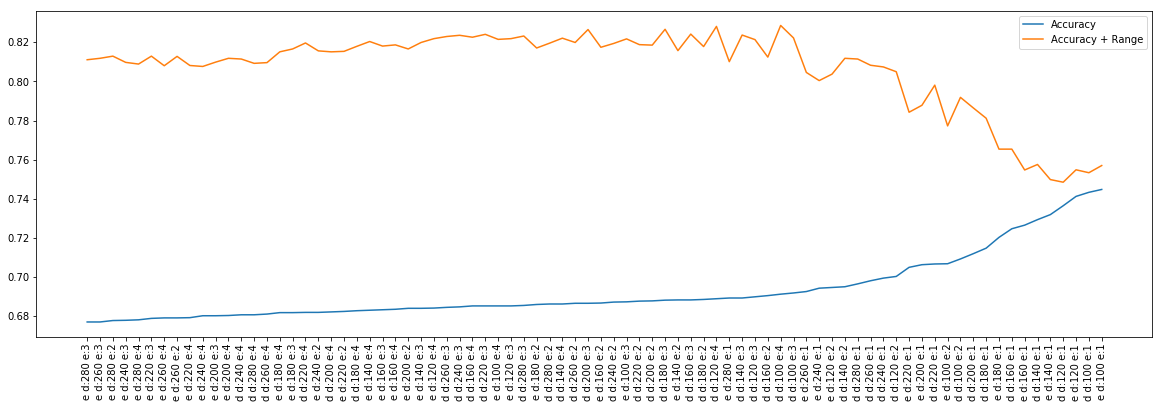

Highest Accuracy


,Name,Accuracy,Range,CrossValScores,loss,max_depth,n_estimators
79,e d:100 e:1,0.744691,0.0122464,"[0.751104565538, 0.7441089838, 0.738858195212]",exponential,1.0,100.0
78,d d:100 e:1,0.743218,0.0100376,"[0.747790868925, 0.7441089838, 0.737753222836]",deviance,1.0,100.0
77,e d:120 e:1,0.741132,0.013623,"[0.748159057437, 0.734536082474, 0.740699815838]",exponential,1.0,120.0
76,d d:120 e:1,0.736345,0.0120547,"[0.728645066274, 0.739690721649, 0.740699815838]",deviance,1.0,120.0
75,e d:140 e:1,0.731804,0.0179464,"[0.724594992636, 0.728276877761, 0.742541436464]",exponential,1.0,140.0



Lowest Range


,Name,Accuracy,Range,CrossValScores,loss,max_depth,n_estimators
78,d d:100 e:1,0.743218,0.0100376,"[0.747790868925, 0.7441089838, 0.737753222836]",deviance,1.0,100.0
76,d d:120 e:1,0.736345,0.0120547,"[0.728645066274, 0.739690721649, 0.740699815838]",deviance,1.0,120.0
79,e d:100 e:1,0.744691,0.0122464,"[0.751104565538, 0.7441089838, 0.738858195212]",exponential,1.0,100.0
77,e d:120 e:1,0.741132,0.013623,"[0.748159057437, 0.734536082474, 0.740699815838]",exponential,1.0,120.0
75,e d:140 e:1,0.731804,0.0179464,"[0.724594992636, 0.728276877761, 0.742541436464]",exponential,1.0,140.0


In [746]:
gradBoostTuner5.FullResult()

In [743]:
ranges = {'loss': ['exponential', 'deviance'],
    'n_esitmators': range(250,500,20),
    'max_depth': range(1,5,1)}
gradBoostTuner5 = GradientBoostTuner(X,y,cvFolds=3,**ranges)

100% d d:490 e:4


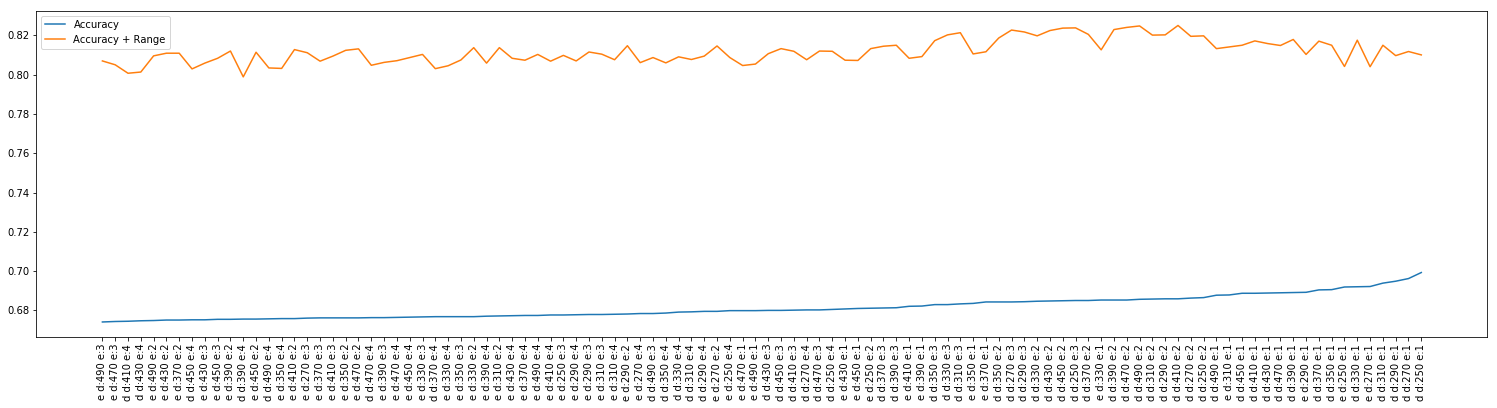

Highest Accuracy


,Name,Accuracy,Range,CrossValScores,loss,max_depth,n_estimators
103,d d:250 e:1,0.699281,0.110731,"[0.634388807069, 0.718335787923, 0.745119705341]",deviance,1.0,250.0
102,d d:270 e:1,0.696213,0.115517,"[0.629602356406, 0.713917525773, 0.745119705341]",deviance,1.0,270.0
101,d d:290 e:1,0.694863,0.114781,"[0.629970544919, 0.709867452135, 0.744751381215]",deviance,1.0,290.0
100,d d:310 e:1,0.693881,0.12104,"[0.624079528719, 0.712444771723, 0.745119705341]",deviance,1.0,310.0
99,e d:270 e:1,0.692163,0.111835,"[0.631811487482, 0.701030927835, 0.74364640884]",exponential,1.0,270.0



Lowest Range


,Name,Accuracy,Range,CrossValScores,loss,max_depth,n_estimators
103,d d:250 e:1,0.699281,0.110731,"[0.634388807069, 0.718335787923, 0.745119705341]",deviance,1.0,250.0
99,e d:270 e:1,0.692163,0.111835,"[0.631811487482, 0.701030927835, 0.74364640884]",exponential,1.0,270.0
97,e d:250 e:1,0.691917,0.112203,"[0.630706921944, 0.702135493373, 0.742909760589]",exponential,1.0,250.0
101,d d:290 e:1,0.694863,0.114781,"[0.629970544919, 0.709867452135, 0.744751381215]",deviance,1.0,290.0
102,d d:270 e:1,0.696213,0.115517,"[0.629602356406, 0.713917525773, 0.745119705341]",deviance,1.0,270.0


In [744]:
gradBoostTuner5.FullResult()

In [740]:
ranges = {'loss': ['exponential', 'deviance'],
    'n_esitmators': range(250,500,20),
    'max_depth': range(1,5,1)}

In [741]:
gradBoostTuner5 = GradientBoostTuner(X,y,cvFolds=3,**ranges)

100% d d:490 e:4


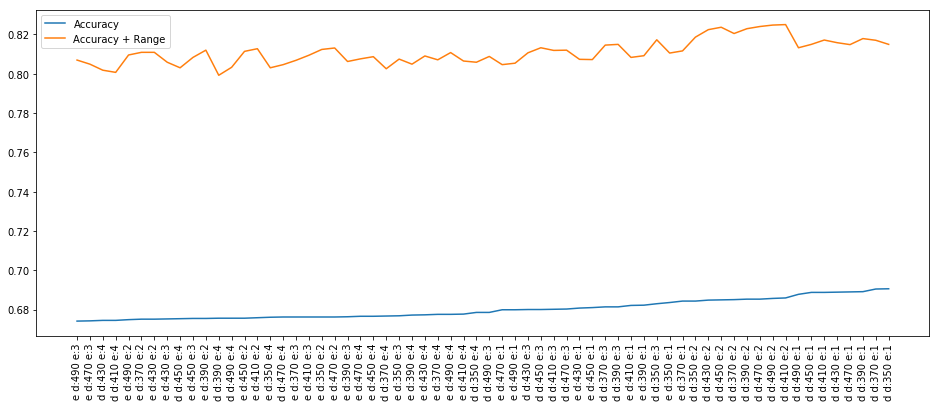

Highest Accuracy


,Name,Accuracy,Range,CrossValScores,loss,max_depth,n_estimators
63,d d:350 e:1,0.690568,0.124354,"[0.621134020619, 0.705081001473, 0.745488029466]",deviance,1.0,350.0
62,d d:370 e:1,0.690445,0.126563,"[0.619293078056, 0.70618556701, 0.745856353591]",deviance,1.0,370.0
61,d d:390 e:1,0.689095,0.128773,"[0.617452135493, 0.703608247423, 0.746224677716]",deviance,1.0,390.0
60,d d:470 e:1,0.688972,0.125826,"[0.618924889543, 0.70324005891, 0.744751381215]",deviance,1.0,470.0
59,d d:430 e:1,0.688849,0.126931,"[0.618556701031, 0.702503681885, 0.745488029466]",deviance,1.0,430.0



Lowest Range


,Name,Accuracy,Range,CrossValScores,loss,max_depth,n_estimators
11,d d:390 e:4,0.675593,0.123612,"[0.60677466863, 0.689617083947, 0.730386740331]",deviance,4.0,390.0
63,d d:350 e:1,0.690568,0.124354,"[0.621134020619, 0.705081001473, 0.745488029466]",deviance,1.0,350.0
33,e d:470 e:1,0.67989,0.124722,"[0.619293078056, 0.676362297496, 0.744014732965]",exponential,1.0,470.0
34,e d:490 e:1,0.67989,0.125458,"[0.618924889543, 0.676362297496, 0.74438305709]",exponential,1.0,490.0
56,d d:490 e:1,0.687745,0.125458,"[0.618924889543, 0.699926362297, 0.74438305709]",deviance,1.0,490.0


In [742]:
gradBoostTuner5.FullResult()

In [ ]:
ranges = {'loss': ['exponential', 'deviance'],
    'n_esitmators': range(400,800,20),
    'max_depth': range(1,10,2)}

In [ ]:
ranges = {'loss': ['exponential', 'deviance'],
    'n_esitmators': range(350,500,20),
    'max_depth': range(1,5,1)}

In [737]:
gradBoostTuner5 = GradientBoostTuner(X,y,cvFolds=2,**ranges)

100% d d:780 e:9


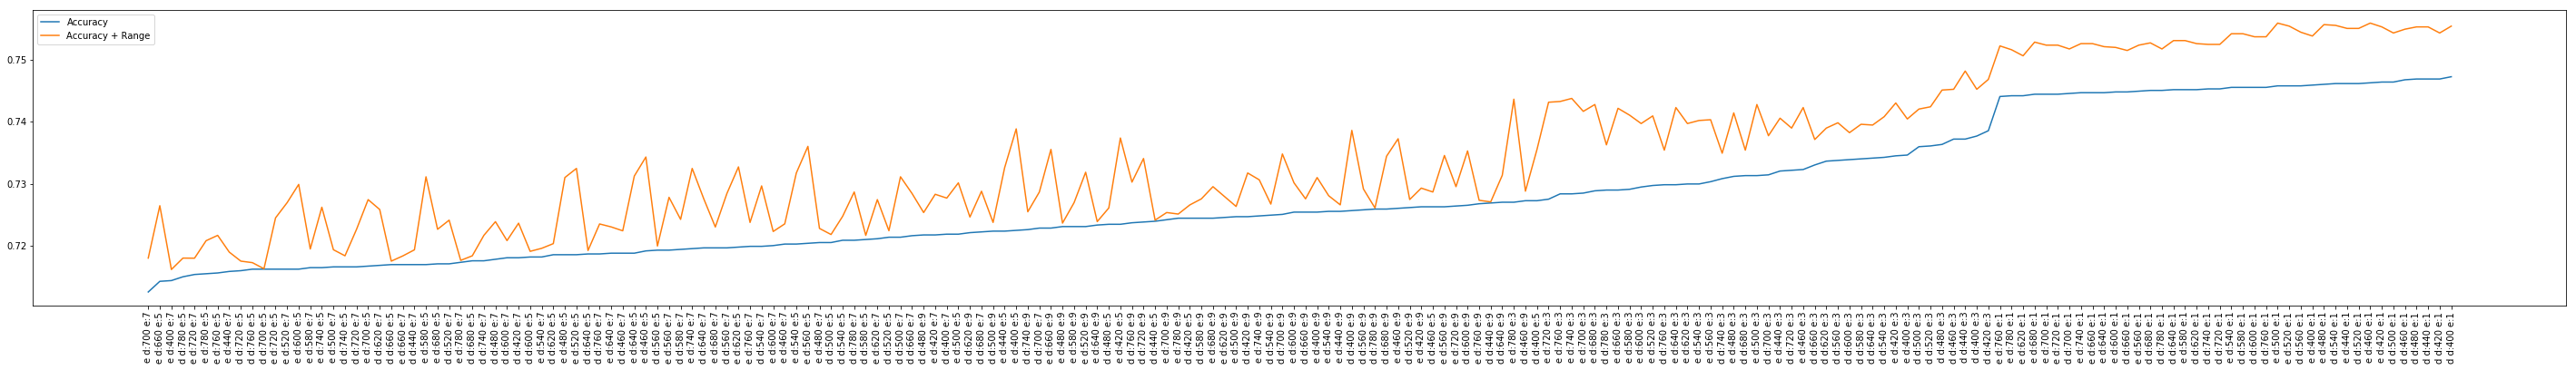

Highest Accuracy


,Name,Accuracy,Range,CrossValScores,loss,max_depth,n_estimators
199,d d:400 e:1,0.747268,0.00816318,"[0.751350024546, 0.743186840167]",deviance,1.0,400.0
198,d d:420 e:1,0.7469,0.00742681,"[0.750613647521, 0.743186840167]",deviance,1.0,420.0
197,d d:440 e:1,0.7469,0.00840876,"[0.751104565538, 0.74269580162]",deviance,1.0,440.0
196,d d:480 e:1,0.7469,0.00840876,"[0.751104565538, 0.74269580162]",deviance,1.0,480.0
195,d d:460 e:1,0.746777,0.0081633,"[0.750859106529, 0.74269580162]",deviance,1.0,460.0



Lowest Range


,Name,Accuracy,Range,CrossValScores,loss,max_depth,n_estimators
10,d d:700 e:5,0.716215,6.96662e-05,"[0.716249386352, 0.716179720108]",deviance,5.0,700.0
87,d d:440 e:5,0.723947,0.000177721,"[0.723858615611, 0.724036336852]",deviance,5.0,440.0
106,d d:780 e:9,0.725911,0.000178203,"[0.725822287678, 0.726000491039]",deviance,9.0,780.0
116,d d:440 e:9,0.726893,0.000178444,"[0.726804123711, 0.726982568132]",deviance,9.0,440.0
27,e d:780 e:7,0.717319,0.000314884,"[0.717476681394, 0.717161797201]",exponential,7.0,780.0


In [738]:
gradBoostTuner5.FullResult()

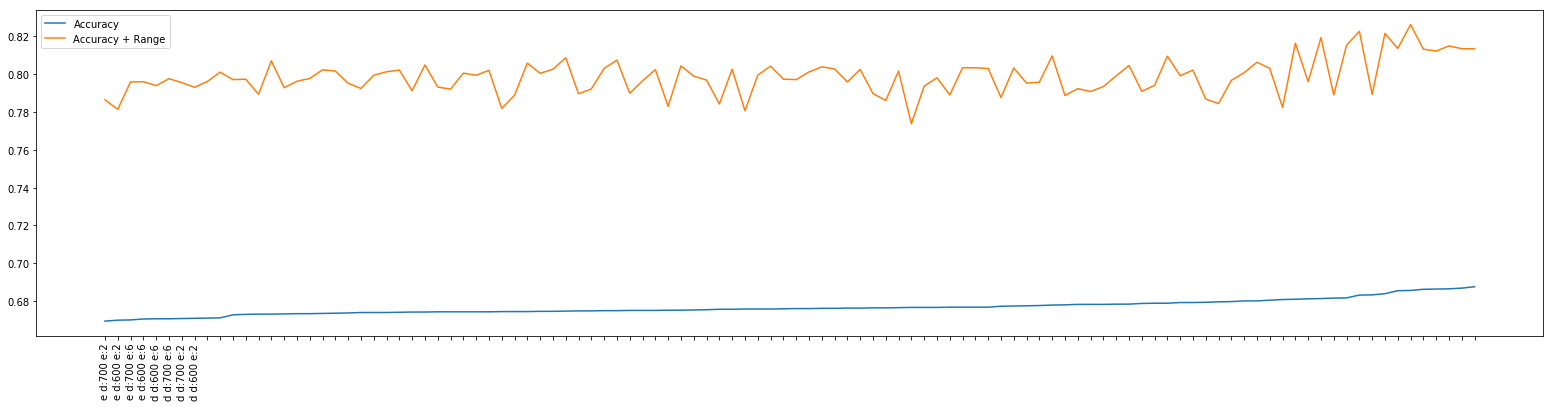

Highest Accuracy


,Name,Accuracy,Range,CrossValScores,loss,max_depth,n_estimators
107,d d:500 e:1,0.687622,0.125826,"[0.618556701031, 0.699926362297, 0.74438305709]",deviance,1.0,500.0
106,d d:600 e:1,0.686886,0.126563,"[0.618188512518, 0.697717231222, 0.744751381215]",deviance,1.0,600.0
105,d d:700 e:1,0.686518,0.128404,"[0.617452135493, 0.696244477172, 0.745856353591]",deviance,1.0,700.0
104,d d:550 e:1,0.686395,0.125826,"[0.618188512518, 0.696980854197, 0.744014732965]",deviance,1.0,550.0
103,d d:650 e:1,0.686272,0.126931,"[0.617820324006, 0.696244477172, 0.744751381215]",deviance,1.0,650.0



Lowest Range


,Name,Accuracy,Range,CrossValScores,loss,max_depth,n_estimators
63,e d:700 e:8,0.676695,0.0970954,"[0.614138438881, 0.70471281296, 0.71123388582]",exponential,8.0,700.0
92,e d:650 e:8,0.680869,0.101516,"[0.617083946981, 0.706921944035, 0.718600368324]",exponential,8.0,650.0
50,e d:750 e:8,0.675836,0.104829,"[0.610824742268, 0.701030927835, 0.715653775322]",exponential,8.0,750.0
87,e d:600 e:9,0.679642,0.10483,"[0.614138438881, 0.705817378498, 0.718968692449]",exponential,9.0,600.0
99,e d:500 e:8,0.683324,0.105935,"[0.614506627393, 0.715022091311, 0.72044198895]",exponential,8.0,500.0


In [734]:
gradBoostTuner5.FullResult()

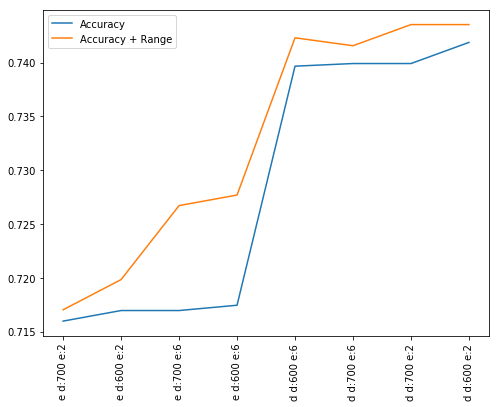

Highest Accuracy


,Name,Accuracy,Range,CrossValScores,loss,max_depth,n_estimators
7,d d:600 e:2,0.741868,0.00165506,"[0.741040746195, 0.74269580162]",deviance,2.0,600.0
6,e d:700 e:2,0.739904,0.00361849,"[0.738095238095, 0.741713724527]",exponential,2.0,700.0
5,d d:700 e:2,0.739904,0.00165457,"[0.739077074129, 0.740731647434]",deviance,2.0,700.0
4,e d:600 e:2,0.739659,0.00263647,"[0.738340697104, 0.740977166708]",exponential,2.0,600.0
3,e d:600 e:6,0.717443,0.0102412,"[0.712322042219, 0.722563221213]",exponential,6.0,600.0



Lowest Range


,Name,Accuracy,Range,CrossValScores,loss,max_depth,n_estimators
0,e d:700 e:6,0.715969,0.00105168,"[0.716494845361, 0.715443162288]",exponential,6.0,700.0
5,d d:700 e:2,0.739904,0.00165457,"[0.739077074129, 0.740731647434]",deviance,2.0,700.0
7,d d:600 e:2,0.741868,0.00165506,"[0.741040746195, 0.74269580162]",deviance,2.0,600.0
4,e d:600 e:2,0.739659,0.00263647,"[0.738340697104, 0.740977166708]",exponential,2.0,600.0
1,d d:600 e:6,0.716951,0.00287638,"[0.715513009327, 0.718389393567]",deviance,6.0,600.0


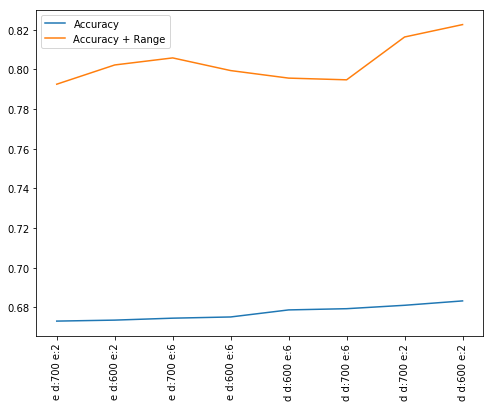

Highest Accuracy


,Name,Accuracy,Range,CrossValScores,loss,max_depth,n_estimators
7,d d:600 e:2,0.683205,0.139452,"[0.611929307806, 0.686303387334, 0.75138121547]",deviance,2.0,600.0
6,d d:700 e:2,0.680995,0.135401,"[0.613402061856, 0.680780559647, 0.748802946593]",deviance,2.0,700.0
5,d d:700 e:6,0.679274,0.115509,"[0.60824742268, 0.705817378498, 0.723756906077]",deviance,6.0,700.0
4,d d:600 e:6,0.67866,0.116982,"[0.60677466863, 0.705449189985, 0.723756906077]",deviance,6.0,600.0
3,e d:700 e:6,0.675101,0.124347,"[0.60088365243, 0.699189985272, 0.725230202578]",exponential,6.0,700.0



Lowest Range


,Name,Accuracy,Range,CrossValScores,loss,max_depth,n_estimators
5,d d:700 e:6,0.679274,0.115509,"[0.60824742268, 0.705817378498, 0.723756906077]",deviance,6.0,700.0
4,d d:600 e:6,0.67866,0.116982,"[0.60677466863, 0.705449189985, 0.723756906077]",deviance,6.0,600.0
0,e d:600 e:6,0.673014,0.119558,"[0.59941089838, 0.700662739323, 0.718968692449]",exponential,6.0,600.0
3,e d:700 e:6,0.675101,0.124347,"[0.60088365243, 0.699189985272, 0.725230202578]",exponential,6.0,700.0
1,e d:700 e:2,0.673508,0.128772,"[0.616715758468, 0.658321060383, 0.745488029466]",exponential,2.0,700.0


In [728]:
gradBoostTuner3.FullResult()

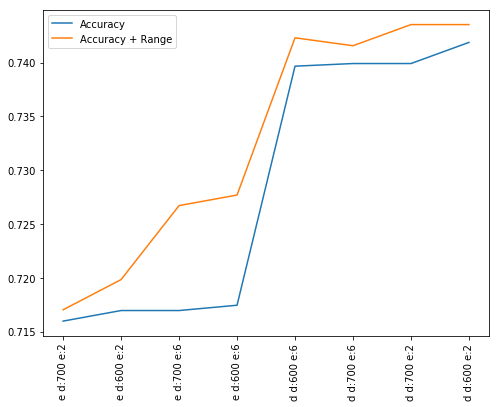

Highest Accuracy


,Name,Accuracy,Range,CrossValScores,loss,max_depth,n_estimators
7,d d:600 e:2,0.741868,0.00165506,"[0.741040746195, 0.74269580162]",deviance,2.0,600.0
6,e d:700 e:2,0.739904,0.00361849,"[0.738095238095, 0.741713724527]",exponential,2.0,700.0
5,d d:700 e:2,0.739904,0.00165457,"[0.739077074129, 0.740731647434]",deviance,2.0,700.0
4,e d:600 e:2,0.739659,0.00263647,"[0.738340697104, 0.740977166708]",exponential,2.0,600.0
3,e d:600 e:6,0.717443,0.0102412,"[0.712322042219, 0.722563221213]",exponential,6.0,600.0



Lowest Range


,Name,Accuracy,Range,CrossValScores,loss,max_depth,n_estimators
0,e d:700 e:6,0.715969,0.00105168,"[0.716494845361, 0.715443162288]",exponential,6.0,700.0
5,d d:700 e:2,0.739904,0.00165457,"[0.739077074129, 0.740731647434]",deviance,2.0,700.0
7,d d:600 e:2,0.741868,0.00165506,"[0.741040746195, 0.74269580162]",deviance,2.0,600.0
4,e d:600 e:2,0.739659,0.00263647,"[0.738340697104, 0.740977166708]",exponential,2.0,600.0
1,d d:600 e:6,0.716951,0.00287638,"[0.715513009327, 0.718389393567]",deviance,6.0,600.0


In [726]:
gradBoostTuner.FullResult()

In [704]:
dataResults = pd.DataFrame()
dataResults = gradBoostTuner.results

In [706]:
dataResults = dataResults.sort_values(['Accuracy'], axis=0)

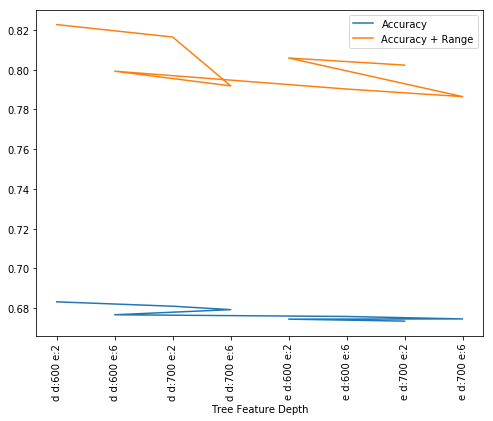

In [707]:
labels = []
widthscale = dataResults.shape[0]/4
if widthscale < 8:
    widthscale = 8
plt.figure(figsize=(widthscale,6))
plt.plot(dataResults['Name'], dataResults['Accuracy'])
labels.append('Accuracy')
plt.plot(dataResults['Name'], dataResults['Accuracy'] + dataResults['Range'])
labels.append('Accuracy + Range')
plt.xlabel('Tree Feature Depth')
plt.legend(labels)
plt.xticks(rotation=90)
plt.show()

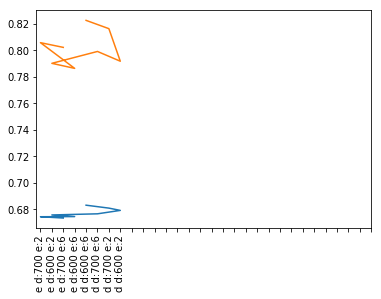

In [708]:
plt.plot(dataResults['Accuracy'])
plt.plot(dataResults['Accuracy'] + dataResults['Range'])
plt.xticks(np.arange(30), (dataResults['Name']),rotation=90)
plt.show()

In [710]:
dataResults

,Name,Accuracy,Range,CrossValScores,loss,max_depth,n_estimators
2,e d:700 e:2,0.673508,0.128772,"[0.616715758468, 0.658321060383, 0.745488029466]",exponential,2.0,700.0
0,e d:600 e:2,0.67449,0.13135,"[0.616347569956, 0.65942562592, 0.747697974217]",exponential,2.0,600.0
3,e d:700 e:6,0.67461,0.111826,"[0.606406480118, 0.699189985272, 0.718232044199]",exponential,6.0,700.0
1,e d:600 e:6,0.675837,0.114403,"[0.604565537555, 0.703976435935, 0.718968692449]",exponential,6.0,600.0
5,d d:600 e:6,0.676697,0.122505,"[0.601251840943, 0.705081001473, 0.723756906077]",deviance,6.0,600.0
7,d d:700 e:6,0.679274,0.112563,"[0.608983799705, 0.707290132548, 0.721546961326]",deviance,6.0,700.0
6,d d:700 e:2,0.680995,0.135401,"[0.613402061856, 0.680780559647, 0.748802946593]",deviance,2.0,700.0
4,d d:600 e:2,0.683205,0.139452,"[0.611929307806, 0.686303387334, 0.75138121547]",deviance,2.0,600.0


In [715]:
dataResults = dataResults.reset_index(drop=True)

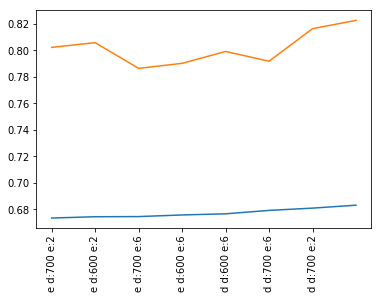

In [716]:
plt.plot(dataResults['Accuracy'])
plt.plot(dataResults['Accuracy'] + dataResults['Range'])
plt.xticks(np.arange(7), (dataResults['Name']),rotation=90)
plt.show()